## Helpful Functions

In [1]:
# ignore warnings
options(warn=-1)
# Data visualization libraries

# plot missing data
library(Amelia)
# barplot
library(ggplot2)
# Multi-variate barplot
#install.packages("gcookbook")
library(gcookbook)
library(dplyr)
# resize figures function
fig <- function(width, heigth){
     options(repr.plot.width = width, repr.plot.height = heigth)
}
#draw confusion matrix
draw_confusion_matrix <- function(cm) {
  
  layout(matrix(c(1,1,2)))
  par(mar=c(2,2,2,2))
  plot(c(100, 345), c(300, 450), type = "n", xlab="", ylab="", xaxt='n', yaxt='n')
  title('CONFUSION MATRIX', cex.main=2)
  
  # create the matrix 
  rect(150, 430, 240, 370, col='#3F97D0')
  text(195, 435, 'Class1', cex=1.2)
  rect(250, 430, 340, 370, col='#F7AD50')
  text(295, 435, 'Class2', cex=1.2)
  text(125, 370, 'Predicted', cex=1.3, srt=90, font=2)
  text(245, 450, 'Actual', cex=1.3, font=2)
  rect(150, 305, 240, 365, col='#F7AD50')
  rect(250, 305, 340, 365, col='#3F97D0')
  text(140, 400, 'Class1', cex=1.2, srt=90)
  text(140, 335, 'Class2', cex=1.2, srt=90)
  
  # add in the cm results 
  res <- as.numeric(cm$table)
  text(195, 400, res[1], cex=1.6, font=2, col='white')
  text(195, 335, res[2], cex=1.6, font=2, col='white')
  text(295, 400, res[3], cex=1.6, font=2, col='white')
  text(295, 335, res[4], cex=1.6, font=2, col='white')
  
  # add in the specifics 
  plot(c(100, 0), c(100, 0), type = "n", xlab="", ylab="", main = "DETAILS", xaxt='n', yaxt='n')
  text(10, 85, names(cm$byClass[1]), cex=1.2, font=2)
  text(10, 70, round(as.numeric(cm$byClass[1]), 3), cex=1.2)
  text(30, 85, names(cm$byClass[2]), cex=1.2, font=2)
  text(30, 70, round(as.numeric(cm$byClass[2]), 3), cex=1.2)
  text(50, 85, names(cm$byClass[5]), cex=1.2, font=2)
  text(50, 70, round(as.numeric(cm$byClass[5]), 3), cex=1.2)
  text(70, 85, names(cm$byClass[6]), cex=1.2, font=2)
  text(70, 70, round(as.numeric(cm$byClass[6]), 3), cex=1.2)
  text(90, 85, names(cm$byClass[7]), cex=1.2, font=2)
  text(90, 70, round(as.numeric(cm$byClass[7]), 3), cex=1.2)
  
  # add in the accuracy information 
  text(30, 35, names(cm$overall[1]), cex=1.5, font=2)
  text(30, 20, round(as.numeric(cm$overall[1]), 3), cex=1.4)
  text(70, 35, names(cm$overall[2]), cex=1.5, font=2)
  text(70, 20, round(as.numeric(cm$overall[2]), 3), cex=1.4)
}

classification_error_rate <- function(df){
        names   = c("class", "scored.class")
        columns = df[colnames(df) %in% names]
        t       = table(columns)
        classification_error_rate = (t[1,2] + t[2,1]) / (t[2,2] + t[1,2] + t[1,1] +         t[2,1])
        classification_error_rate = round(classification_error_rate, 2)
        paste0('The classification error rate is: ',classification_error_rate)
}
prediction_accuracy <- function(df){
        names    = c("class", "scored.class")
        columns  = df[colnames(df) %in% names]
        t        = table(columns)
        accuracy = (t[2,2] + t[1,1]) / (t[2,2] + t[1,2] + t[1,1] + t[2,1])
        accuracy = round(accuracy, 2)
        paste0("The prediction accuracy is: ", accuracy)
}
precision <- function(df){
        names   = c("class", "scored.class")
        columns = df[colnames(df) %in% names]
        t       = table(columns)
        p       = (t[2,2] / (t[2,2] + t[1,2]))
        p       = round(p, 2)
        paste0('The precision is: ', p)
}
sensitivity <- function(df){
        names   = c("class", "scored.class")
        columns = df[colnames(df) %in% names]
        t       = table(columns)
        s       = t[2,2] / (t[2,2] + t[2,1])
        s       = round(s,2)
        paste0('The sensitiity is: ',s)
}
specificity <- function(df){
        names   = c("class", "scored.class")
        columns = df[colnames(df) %in% names]
        t       = table(columns)
        s       = t[1,1] / (t[1,1] + t[1,2])
        s       = round(s,2)
        paste0('The specificity is: ',s)
}
f1.score <- function(df){
        names   = c("class", "scored.class")
        columns = df[colnames(df) %in% names]
        t = table(columns)
        p = (t[2,2] / (t[2,2] + t[1,2]))
        s = t[2,2] / (t[2,2] + t[2,1])
        f1 = (2*p*s) / (p + s)
        f1 = round(f1, 2)
        paste0("The F1 score is: ", f1)
}
get.rocPlot.auc = function(df){
library(ggplot2)
threshold.grid = seq(0,1, by= 0.01)
predicted.classes = data.frame(row.names = 1:nrow(df))
x = seq_along(threshold.grid)
y = seq_along(threshold.grid)
for (i in threshold.grid) {
        yhat = as.numeric(df$scored.probability>i)
        predicted.classes = cbind(predicted.classes, yhat)
}
for (j in 1:length(threshold.grid)){
                class.factor = factor(df$class,levels = c(0,1))
                predicted.class.factor = factor(predicted.classes[,j], levels = c(0,1))
                t = table(class.factor, predicted.class.factor)
                sensitivity = t[2,2] / (t[2,2] + t[2,1])
                specificity = t[1,1] / (t[1,1] + t[1,2])
                y[j] = sensitivity
                x[j] = 1 - specificity
}

roc.data = data.frame(fpr = x, tpr = y)
roc.plot = ggplot(roc.data, aes(x=fpr, y=tpr)) + geom_step()
roc.plot = roc.plot + geom_abline(slope = 1, intercept = c(0,0), colour="red", lty=2)

my_auc <- function(outcome, proba){
 N = length(proba)
 N_pos = sum(outcome)
 df = data.frame(out = outcome, prob = proba)
 df = df[order(-df$prob),]
 df$above = (1:N) - cumsum(df$out)
 return( 1- sum( df$above * df$out ) / (N_pos * (N-N_pos) ) )
}

auc1 = my_auc(preds$class,preds$scored.probability)
results = list("Plot"=roc.plot, "Area under curve"=auc1)
results
}

Loading required package: Rcpp
## 
## Amelia II: Multiple Imputation
## (Version 1.8.0, built: 2021-05-26)
## Copyright (C) 2005-2022 James Honaker, Gary King and Matthew Blackwell
## Refer to http://gking.harvard.edu/amelia/ for more information
## 

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



# Data Gathering and Visualization

In [2]:
df =read.csv("https://raw.githubusercontent.com/mofouadelsayed/Harvard.Capstone/main/covid-19-alberta-statistics-data.csv",header =TRUE, sep =",",stringsAsFactors = FALSE)

head(df)

X,Date.reported,Alberta.Health.Services.Zone,Gender,Age.group,Case.status,Case.type
1,2020-11-13,Calgary Zone,Female,1-4 years,Recovered,Confirmed
2,2021-04-21,Edmonton Zone,Male,30-39 years,Recovered,Confirmed
3,2021-05-17,North Zone,Male,10-19 years,Recovered,Confirmed
4,2020-12-13,Edmonton Zone,Male,5-9 years,Recovered,Confirmed
5,2021-01-05,Central Zone,Male,50-59 years,Recovered,Confirmed
6,2021-05-11,Edmonton Zone,Male,60-69 years,Recovered,Confirmed


In [3]:
# data characteristics
print("Data dimension")
dim(df)

print("Number of missing values")
sum(is.na(df))

print("Number of duplicated values")
dim(df[duplicated(df),])[1]


[1] "Data dimension"


[1] 312285      7

[1] "Number of missing values"


[1] 0

[1] "Number of duplicated values"


[1] 0

Data has 7 features and +300K observations

Data has no missing values.

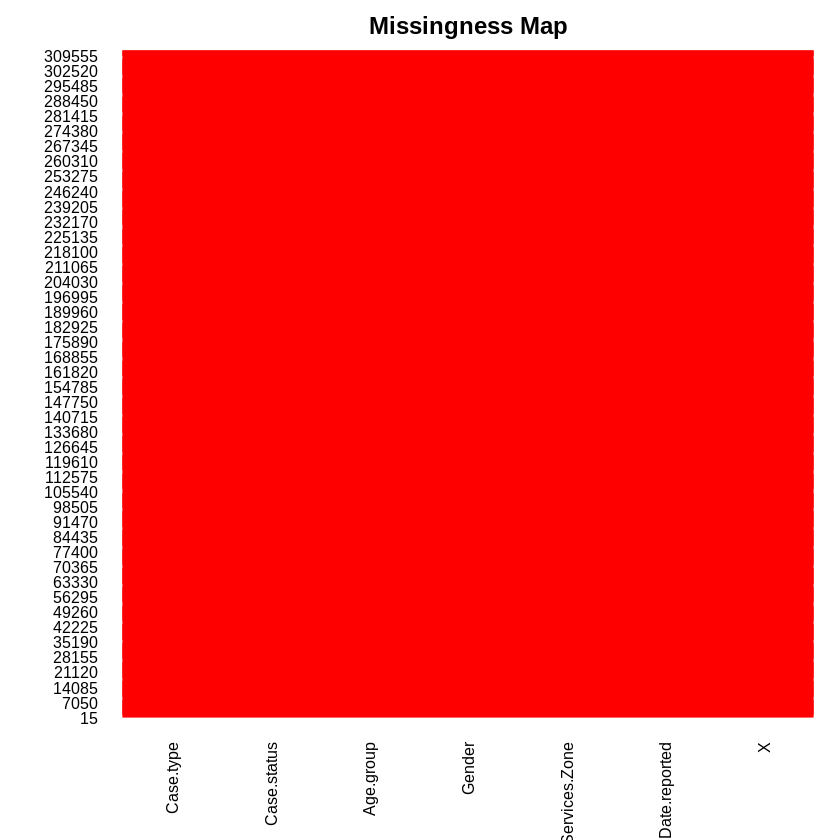

In [4]:
# plot missing data
missmap(df, col=c("blue", "red"), legend=FALSE)

Data is guaranteed not to have missing values.

## Univarite Analysis

### 1. Zone
- The data  points are collected mainly from Calgary Zone and Edmonton Zone.

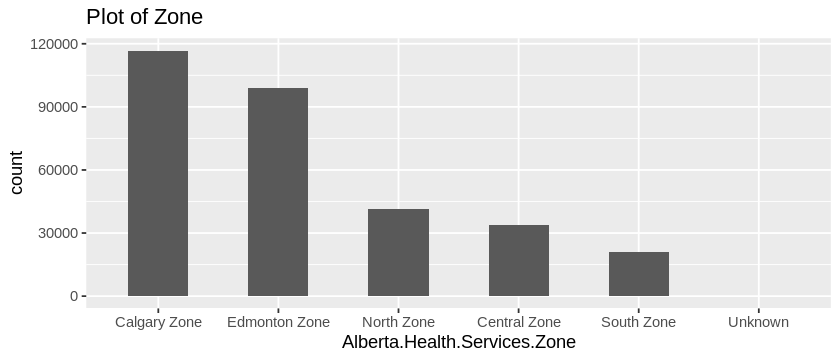

In [6]:
fig(7,3)
df <- within(df, 
                   Alberta.Health.Services.Zone <- factor(Alberta.Health.Services.Zone, 
                                      levels=names(sort(table(Alberta.Health.Services.Zone), 
                                                        decreasing=TRUE))))

ggplot(df,aes(x=Alberta.Health.Services.Zone))+geom_bar(width=.5) + labs(title="Plot of Zone") 



### 2. Age Group
- The data  points are concentrated between [10 - 49 ] years.
- The most frequent age group is between [30 - 39 ] years.

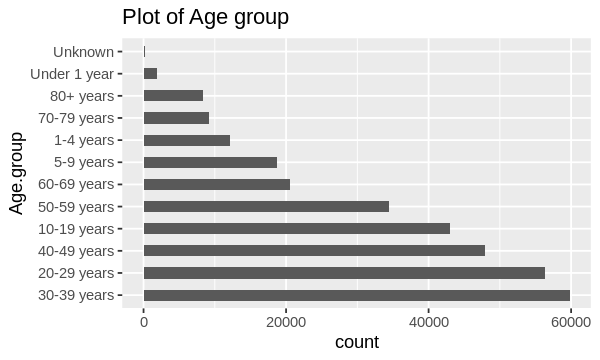

In [7]:
fig(5,3)
df <- within(df, 
                   Age.group <- factor(Age.group, 
                                      levels=names(sort(table(Age.group), 
                                                        decreasing=TRUE))))
ggplot(df,aes(y=Age.group))+geom_bar(width=.5)+ labs(title="Plot of Age group") 


### 3. Status
- The majority of data points are in the recoverd status.

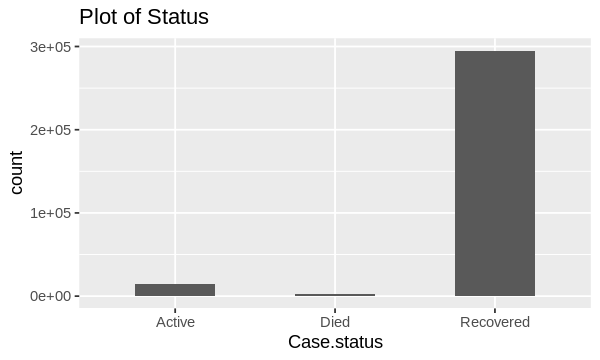

In [8]:
fig(5,3)
df <- within(df, 
                   Status <- factor(Case.status, 
                                      levels=names(sort(table(Case.status), 
                                                        decreasing=TRUE))))
ggplot(df,aes(x=Case.status))+geom_bar(width=.5)+ labs(title="Plot of Status") 

### 4. Type (Label)
- The majority of data points are of the confirmed type.
- Data is unbalanced, hence we may need upsampling.

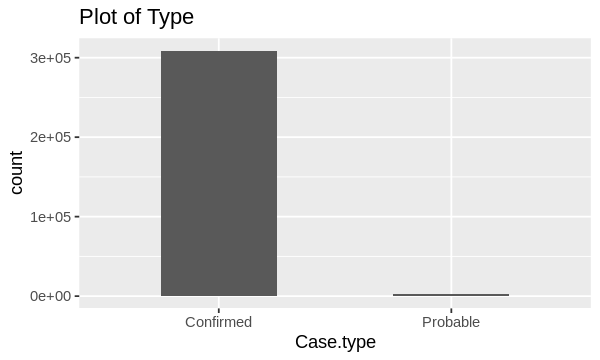

In [9]:
fig(5,3)
df <- within(df, 
                   Type <- factor(Case.type, 
                                      levels=names(sort(table(Case.type), 
                                                        decreasing=TRUE))))
ggplot(df,aes(x=Case.type))+geom_bar(width=.5)+ labs(title="Plot of Type") 

### 5. Gender
- The data has equally data points from both gender.

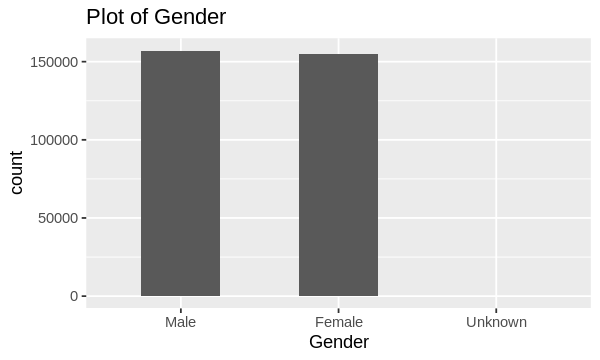

In [10]:
fig(5,3)
df <- within(df, 
                   Gender <- factor(Gender, 
                                      levels=names(sort(table(Gender), 
                                                        decreasing=TRUE))))
ggplot(df,aes(x=Gender))+geom_bar(width=.5)+ labs(title="Plot of Gender") 

## Multi-Variate Analysis
 the relation between case type and status over different zones.

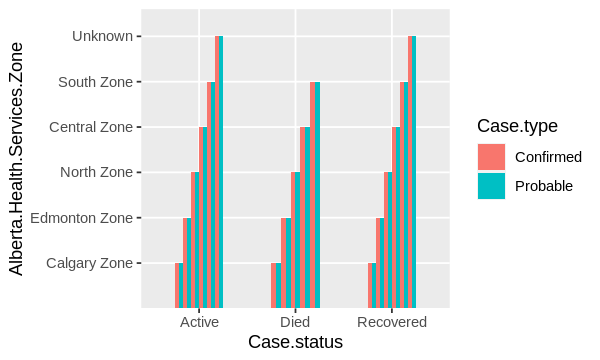

In [13]:

ggplot(df, aes(x = Case.status, y = Alberta.Health.Services.Zone, fill = Case.type)) +
  geom_col(width = 0.5, position = "dodge")

## Data Preparation

In [29]:
# Exclude Unkown and not needed entries
df<- df %>% filter(!Age.group== "Unknown") %>% filter(!Gender== "Unknown") %>% filter(!Case.status== "Active")

In [31]:
head(df)

X,Date.reported,Alberta.Health.Services.Zone,Gender,Age.group,Case.status,Case.type
1,2020-11-13,Calgary Zone,Female,1-4 years,Recovered,Confirmed
2,2021-04-21,Edmonton Zone,Male,30-39 years,Recovered,Confirmed
3,2021-05-17,North Zone,Male,10-19 years,Recovered,Confirmed
4,2020-12-13,Edmonton Zone,Male,5-9 years,Recovered,Confirmed
5,2021-01-05,Central Zone,Male,50-59 years,Recovered,Confirmed
6,2021-05-11,Edmonton Zone,Male,60-69 years,Recovered,Confirmed


In [32]:
#encode label
#install.packages('CatEncoders')
library('CatEncoders')
#install.packages('cleandata')
library(cleandata)

df$Case.type = factor(df$Case.type,
                       levels = c('Confirmed', 'Probable'),
                       labels = c(1, 0))

df$Case.status<-  factor(df$Case.status,
                               levels = c('Recovered','Died'),
                               labels = c(0, 1))


df$Gender = factor(df$Gender,
                       levels = c('Male', 'Female'),
                       labels = c(1, 0))


#encode age group ( ordinal encoding)
df[,5]<- encode_ordinal(df[, 5, drop = FALSE],order=c('Under 1 year','1-4 years','5-9 years',
                                                     '10-19 years','20-29 years',
                                                     '30-39 years','40-49 years','50-59 years','60-69 years',
                                                     '70-79 years','+80 years'));


# encode zone  (categorical data)
library(caret)

t<- df
tt<-df

t$Alberta.Health.Services.Zone <- factor(t$Alberta.Health.Services.Zone, exclude = NULL)

########Q################
# addNA explanation http://www.endmemo.com/r/addna.php
t$Zone <- addNA(t$Alberta.Health.Services.Zone)


dv <- caret::dummyVars("~Alberta.Health.Services.Zone", data = t)
t <- data.frame(predict(dv, newdata = tt))

df_encoded=cbind(t,tt)
head(df_encoded)

       Age.group    
 30-39 years:57096  
 20-29 years:54551  
 40-49 years:45724  
 10-19 years:40941  
 50-59 years:32940  
 60-69 years:19432  
 (Other)    :47045  
coded 1 cols 11 levels 
   Age.group    
 6      :57096  
 5      :54551  
 7      :45724  
 4      :40941  
 8      :32940  
 9      :19432  
 (Other):47045  


Alberta.Health.Services.Zone.Calgary.Zone,Alberta.Health.Services.Zone.Central.Zone,Alberta.Health.Services.Zone.Edmonton.Zone,Alberta.Health.Services.Zone.North.Zone,Alberta.Health.Services.Zone.South.Zone,Alberta.Health.Services.Zone.Unknown,X,Date.reported,Alberta.Health.Services.Zone,Gender,Age.group,Case.status,Case.type
1,0,0,0,0,0,1,2020-11-13,Calgary Zone,0,2,0,1
0,0,1,0,0,0,2,2021-04-21,Edmonton Zone,1,6,0,1
0,0,0,1,0,0,3,2021-05-17,North Zone,1,4,0,1
0,0,1,0,0,0,4,2020-12-13,Edmonton Zone,1,3,0,1
0,1,0,0,0,0,5,2021-01-05,Central Zone,1,8,0,1
0,0,1,0,0,0,6,2021-05-11,Edmonton Zone,1,9,0,1


In [33]:
# drop un-needed columns

df_encoded=subset(df_encoded, select=-c(X,Date.reported,Alberta.Health.Services.Zone))
head(df_encoded)

Alberta.Health.Services.Zone.Calgary.Zone,Alberta.Health.Services.Zone.Central.Zone,Alberta.Health.Services.Zone.Edmonton.Zone,Alberta.Health.Services.Zone.North.Zone,Alberta.Health.Services.Zone.South.Zone,Alberta.Health.Services.Zone.Unknown,Gender,Age.group,Case.status,Case.type
1,0,0,0,0,0,0,2,0,1
0,0,1,0,0,0,1,6,0,1
0,0,0,1,0,0,1,4,0,1
0,0,1,0,0,0,1,3,0,1
0,1,0,0,0,0,1,8,0,1
0,0,1,0,0,0,1,9,0,1


In [34]:
# observe columns data types
str(df_encoded)


'data.frame':	297729 obs. of  10 variables:
 $ Alberta.Health.Services.Zone.Calgary.Zone : num  1 0 0 0 0 0 1 0 0 0 ...
 $ Alberta.Health.Services.Zone.Central.Zone : num  0 0 0 0 1 0 0 0 0 1 ...
 $ Alberta.Health.Services.Zone.Edmonton.Zone: num  0 1 0 1 0 1 0 0 1 0 ...
 $ Alberta.Health.Services.Zone.North.Zone   : num  0 0 1 0 0 0 0 0 0 0 ...
 $ Alberta.Health.Services.Zone.South.Zone   : num  0 0 0 0 0 0 0 1 0 0 ...
 $ Alberta.Health.Services.Zone.Unknown      : num  0 0 0 0 0 0 0 0 0 0 ...
 $ Gender                                    : Factor w/ 2 levels "1","0": 2 1 1 1 1 1 2 2 2 2 ...
 $ Age.group                                 : Factor w/ 12 levels "6","5","7","4",..: 8 1 4 7 5 6 8 10 11 4 ...
 $ Case.status                               : Factor w/ 2 levels "0","1": 1 1 1 1 1 1 1 1 1 1 ...
 $ Case.type                                 : Factor w/ 2 levels "1","0": 1 1 1 1 1 1 1 1 1 1 ...


It's seen that after encoding, it resluted in some missing values to be dropped.

In [35]:
sum(is.na(df_encoded))
df_encoded=na.omit(df_encoded)

[1] 0

In [37]:
# # Splitting the dataset into the Training set and Test set
# install.packages('caTools')
library(caTools)
set.seed(123)

split = sample.split(df_encoded$Case.status, SplitRatio = 0.8)
train = subset(df_encoded, split == TRUE)
test = subset(df_encoded, split == FALSE)

#train_rows <- sample(seq_len(nrow(df_encoded)), size = floor(0.7 * nrow(df_encoded)))
#train <- df_encoded[train_rows, ]
#rest_df<- df_encoded[-train_rows, ]

#test_rows <- sample(seq_len(nrow(rest_df)), size = floor(0.5 * nrow(rest_df)))
#test <- rest_df[test_rows, ]
#valid <- rest_df[-test_rows, ]


In [38]:
# train and test and validation dimensions
dim(train)
dim(test)


[1] 238183     10

[1] 59546    10

# 1. Logistic Regression


### Unbalanced data

- The precision value in the training phase was 0.5 which is fair, however in the testing phase, the precision value has raised up to 0.75 which indicates learning

Train metric

In [39]:
library(caret)
# logistic regression

unbal_glm_fit<- train %>% glm(Case.status ~ ., data=., family = "binomial")
unbal_glm_pred<- ifelse(predict(unbal_glm_fit, newdata = train, type = "response") >0.5, 1, 0)

confusionMatrix(as.factor(unbal_glm_pred), train$Case.status, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 235863   2320
         1      0      0
                                          
               Accuracy : 0.9903          
                 95% CI : (0.9899, 0.9907)
    No Information Rate : 0.9903          
    P-Value [Acc > NIR] : 0.5055          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.00000         
            Specificity : 1.00000         
         Pos Pred Value :     NaN         
         Neg Pred Value : 0.99026         
             Prevalence : 0.00974         
         Detection Rate : 0.00000         
   Detection Prevalence : 0.00000         
      Balanced Accuracy : 0.50000         
                                          
       'Positive' Class : 1               
            

Test metric

In [40]:
unbal_glm_pred<- ifelse(predict(unbal_glm_fit, newdata = test, type = "response") >0.5, 1, 0)

confusionMatrix(as.factor(unbal_glm_pred), test$Case.status, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 58966   580
         1     0     0
                                         
               Accuracy : 0.9903         
                 95% CI : (0.9894, 0.991)
    No Information Rate : 0.9903         
    P-Value [Acc > NIR] : 0.511          
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.00000        
            Specificity : 1.00000        
         Pos Pred Value :     NaN        
         Neg Pred Value : 0.99026        
             Prevalence : 0.00974        
         Detection Rate : 0.00000        
   Detection Prevalence : 0.00000        
      Balanced Accuracy : 0.50000        
                                         
       'Positive' Class : 1              
                                      

## Over-Sampling

In [41]:
# Balancing Data
library(doParallel)
#install.packages("ROSE")
library(ROSE) # ovun.sample
over<- ovun.sample(Case.status ~ ., data=train, method = "over", p=0.5)$data
table(over$Case.status)





Loading required package: foreach
Loading required package: iterators
Loading required package: parallel
Loaded ROSE 0.0-4




     0      1 
235863 235772 

In [42]:
over_glm_fit<- over %>% glm(Case.status ~ ., data=., family = "binomial")
over_glm_pred<- ifelse(predict(over_glm_fit, newdata = over, type = "response") >0.5, 1, 0)

confusionMatrix(as.factor(over_glm_pred), over$Case.status, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 200103  22181
         1  35760 213591
                                          
               Accuracy : 0.8771          
                 95% CI : (0.8762, 0.8781)
    No Information Rate : 0.5001          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7543          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9059          
            Specificity : 0.8484          
         Pos Pred Value : 0.8566          
         Neg Pred Value : 0.9002          
             Prevalence : 0.4999          
         Detection Rate : 0.4529          
   Detection Prevalence : 0.5287          
      Balanced Accuracy : 0.8772          
                                          
       'Positive' Class : 1               
            

In [43]:
over_glm_pred<- ifelse(predict(over_glm_fit, newdata = test, type = "response") >0.5, 1, 0)

confusionMatrix(as.factor(over_glm_pred), test$Case.status, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 50094    56
         1  8872   524
                                          
               Accuracy : 0.8501          
                 95% CI : (0.8472, 0.8529)
    No Information Rate : 0.9903          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0883          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.90345         
            Specificity : 0.84954         
         Pos Pred Value : 0.05577         
         Neg Pred Value : 0.99888         
             Prevalence : 0.00974         
         Detection Rate : 0.00880         
   Detection Prevalence : 0.15779         
      Balanced Accuracy : 0.87649         
                                          
       'Positive' Class : 1               
                  

## Over-Sampling with CV

In [44]:
set.seed(222)
control<- trainControl(method = "cv", number= 10,verboseIter=TRUE)

glm_cross<- train(Case.status ~ ., method= "glm", data= over, trControl=control)
print(glm_cross)


+ Fold01: parameter=none 
- Fold01: parameter=none 
+ Fold02: parameter=none 
- Fold02: parameter=none 
+ Fold03: parameter=none 
- Fold03: parameter=none 
+ Fold04: parameter=none 
- Fold04: parameter=none 
+ Fold05: parameter=none 
- Fold05: parameter=none 
+ Fold06: parameter=none 
- Fold06: parameter=none 
+ Fold07: parameter=none 
- Fold07: parameter=none 
+ Fold08: parameter=none 
- Fold08: parameter=none 
+ Fold09: parameter=none 
- Fold09: parameter=none 
+ Fold10: parameter=none 
- Fold10: parameter=none 
Aggregating results
Fitting final model on full training set
Generalized Linear Model 

471635 samples
     9 predictor
     2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 424472, 424472, 424471, 424471, 424472, 424472, ... 
Resampling results:

  Accuracy   Kappa    
  0.8966256  0.7932519



In [45]:
glm_cross_pred<- predict(glm_cross, test)
confusionMatrix(glm_cross_pred, test$Case.status, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 52385    56
         1  6581   524
                                         
               Accuracy : 0.8885         
                 95% CI : (0.886, 0.8911)
    No Information Rate : 0.9903         
    P-Value [Acc > NIR] : 1              
                                         
                  Kappa : 0.1205         
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.90345        
            Specificity : 0.88839        
         Pos Pred Value : 0.07375        
         Neg Pred Value : 0.99893        
             Prevalence : 0.00974        
         Detection Rate : 0.00880        
   Detection Prevalence : 0.11932        
      Balanced Accuracy : 0.89592        
                                         
       'Positive' Class : 1              
                                      

## Under-Sampling

In [46]:
under<- ovun.sample(Case.status~ ., data= train, method = "under",p=0.5)$data
table(under$Case.status)


   0    1 
2368 2320 

In [47]:
under_glm_fit<- under %>% glm(Case.status ~ ., data=., family = "binomial")
under_glm_pred<- ifelse(predict(under_glm_fit, newdata = under, type = "response") >0.5, 1, 0)

confusionMatrix(as.factor(under_glm_pred), under$Case.status, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2110  249
         1  258 2071
                                          
               Accuracy : 0.8919          
                 95% CI : (0.8826, 0.9006)
    No Information Rate : 0.5051          
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.7837          
                                          
 Mcnemar's Test P-Value : 0.7224          
                                          
            Sensitivity : 0.8927          
            Specificity : 0.8910          
         Pos Pred Value : 0.8892          
         Neg Pred Value : 0.8944          
             Prevalence : 0.4949          
         Detection Rate : 0.4418          
   Detection Prevalence : 0.4968          
      Balanced Accuracy : 0.8919          
                                          
       'Positive' Class : 1               
                        

In [48]:
under_glm_pred<- ifelse(predict(under_glm_fit, newdata = test, type = "response") >0.5, 1, 0)

confusionMatrix(as.factor(under_glm_pred), test$Case.status, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 53006    61
         1  5960   519
                                          
               Accuracy : 0.8989          
                 95% CI : (0.8964, 0.9013)
    No Information Rate : 0.9903          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1315          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.894828        
            Specificity : 0.898925        
         Pos Pred Value : 0.080105        
         Neg Pred Value : 0.998851        
             Prevalence : 0.009740        
         Detection Rate : 0.008716        
   Detection Prevalence : 0.108807        
      Balanced Accuracy : 0.896876        
                                          
       'Positive' Class : 1               
                  

## Under-Sampling with CV

In [49]:
set.seed(225)
control<- trainControl(method = "cv", number= 10)

glm_cross<- train(Case.status ~ ., method= "glm", data= under, trControl=control)
print(glm_cross)


Generalized Linear Model 

4688 samples
   9 predictor
   2 classes: '0', '1' 

No pre-processing
Resampling: Cross-Validated (10 fold) 
Summary of sample sizes: 4220, 4219, 4219, 4219, 4220, 4219, ... 
Resampling results:

  Accuracy   Kappa    
  0.8912124  0.7824399



In [50]:
glm_cross_pred<- predict(glm_cross, test)
confusionMatrix(glm_cross_pred, test$Case.status, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 53006    61
         1  5960   519
                                          
               Accuracy : 0.8989          
                 95% CI : (0.8964, 0.9013)
    No Information Rate : 0.9903          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1315          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.894828        
            Specificity : 0.898925        
         Pos Pred Value : 0.080105        
         Neg Pred Value : 0.998851        
             Prevalence : 0.009740        
         Detection Rate : 0.008716        
   Detection Prevalence : 0.108807        
      Balanced Accuracy : 0.896876        
                                          
       'Positive' Class : 1               
                  

# 2. Decision Tree

Loading required package: grid
Loading required package: mvtnorm
Loading required package: modeltools
Loading required package: stats4
Loading required package: strucchange
Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: sandwich


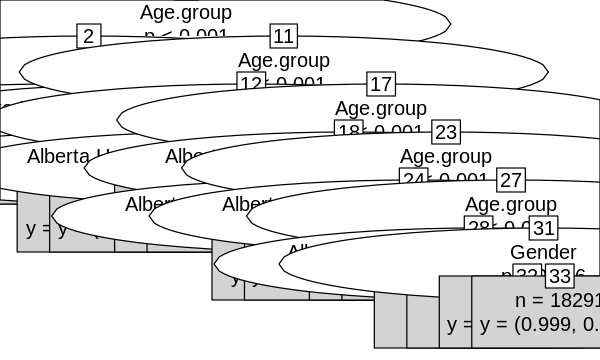

In [51]:
#install.packages("party")
library(party) # Load the party package
tree <- ctree(Case.status ~., data=train)


#plot tree
plot(tree, type="simple")


In [52]:
# Tree evaluation on training data
# predict on test data
trainPred <- predict(tree, newdata = train)
table(trainPred, train$Case.status)
confusionMatrix(as.factor(trainPred), train$Case.status, positive = "1")

         
trainPred      0      1
        0 235863   2320
        1      0      0

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 235863   2320
         1      0      0
                                          
               Accuracy : 0.9903          
                 95% CI : (0.9899, 0.9907)
    No Information Rate : 0.9903          
    P-Value [Acc > NIR] : 0.5055          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.00000         
            Specificity : 1.00000         
         Pos Pred Value :     NaN         
         Neg Pred Value : 0.99026         
             Prevalence : 0.00974         
         Detection Rate : 0.00000         
   Detection Prevalence : 0.00000         
      Balanced Accuracy : 0.50000         
                                          
       'Positive' Class : 1               
            

In [53]:
# Tree evaluation on test data
testPred <- predict(tree, newdata = test)
table(testPred, test$Case.status)
# Tree evaluation on training data
# predict on test data
trainPred <- predict(tree, newdata = test)
table(testPred, test$Case.status)
confusionMatrix(as.factor(testPred), test$Case.status, positive = "1")

        
testPred     0     1
       0 58966   580
       1     0     0

        
testPred     0     1
       0 58966   580
       1     0     0

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 58966   580
         1     0     0
                                         
               Accuracy : 0.9903         
                 95% CI : (0.9894, 0.991)
    No Information Rate : 0.9903         
    P-Value [Acc > NIR] : 0.511          
                                         
                  Kappa : 0              
                                         
 Mcnemar's Test P-Value : <2e-16         
                                         
            Sensitivity : 0.00000        
            Specificity : 1.00000        
         Pos Pred Value :     NaN        
         Neg Pred Value : 0.99026        
             Prevalence : 0.00974        
         Detection Rate : 0.00000        
   Detection Prevalence : 0.00000        
      Balanced Accuracy : 0.50000        
                                         
       'Positive' Class : 1              
                                      

## Over-Sampling

In [54]:
tree <- ctree(Case.status ~., data=over)
trainPred <- predict(tree, newdata = over)
confusionMatrix(as.factor(trainPred), over$Case.status, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction      0      1
         0 206073  18654
         1  29790 217118
                                          
               Accuracy : 0.8973          
                 95% CI : (0.8964, 0.8982)
    No Information Rate : 0.5001          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.7946          
                                          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
            Sensitivity : 0.9209          
            Specificity : 0.8737          
         Pos Pred Value : 0.8793          
         Neg Pred Value : 0.9170          
             Prevalence : 0.4999          
         Detection Rate : 0.4604          
   Detection Prevalence : 0.5235          
      Balanced Accuracy : 0.8973          
                                          
       'Positive' Class : 1               
            

## Over-Sampling with CV

In [55]:
control<- trainControl(method = "cv", number= 10)
set.seed(8, sample.kind = "Rounding")
tree_corss_over<- over %>% ctree(Case.status ~ ., data=.)
print(tree_corss_over)


	 Conditional inference tree with 65 terminal nodes

Response:  Case.status 
Inputs:  Alberta.Health.Services.Zone.Calgary.Zone, Alberta.Health.Services.Zone.Central.Zone, Alberta.Health.Services.Zone.Edmonton.Zone, Alberta.Health.Services.Zone.North.Zone, Alberta.Health.Services.Zone.South.Zone, Alberta.Health.Services.Zone.Unknown, Gender, Age.group, Case.type 
Number of observations:  471635 

1) Age.group == {6, 5, 7, 4, 8, 3, 2, 1}; criterion = 1, statistic = 321383.518
  2) Age.group == {6, 5, 7, 4, 3, 2, 1}; criterion = 1, statistic = 35495.215
    3) Age.group == {7}; criterion = 1, statistic = 11042.485
      4) Gender == {0}; criterion = 1, statistic = 692.243
        5) Alberta.Health.Services.Zone.Calgary.Zone <= 0; criterion = 1, statistic = 238.781
          6) Alberta.Health.Services.Zone.Edmonton.Zone <= 0; criterion = 1, statistic = 123.946
            7) Alberta.Health.Services.Zone.South.Zone <= 0; criterion = 1, statistic = 32.908
              8) Alberta.Health.Se

In [56]:
tree_cross_over_pred<- predict(tree_corss_over, test)

confusionMatrix(tree_cross_over_pred, test$Case.status, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 51580    44
         1  7386   536
                                          
               Accuracy : 0.8752          
                 95% CI : (0.8725, 0.8779)
    No Information Rate : 0.9903          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.1099          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.924138        
            Specificity : 0.874741        
         Pos Pred Value : 0.067660        
         Neg Pred Value : 0.999148        
             Prevalence : 0.009740        
         Detection Rate : 0.009001        
   Detection Prevalence : 0.133040        
      Balanced Accuracy : 0.899440        
                                          
       'Positive' Class : 1               
                  

## Uner-Sampling

In [57]:
tree <- ctree(Case.status ~., data=under)
trainPred <- predict(tree, newdata = under)
confusionMatrix(as.factor(trainPred), under$Case.status, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2081  217
         1  287 2103
                                          
               Accuracy : 0.8925          
                 95% CI : (0.8833, 0.9012)
    No Information Rate : 0.5051          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.785           
                                          
 Mcnemar's Test P-Value : 0.002116        
                                          
            Sensitivity : 0.9065          
            Specificity : 0.8788          
         Pos Pred Value : 0.8799          
         Neg Pred Value : 0.9056          
             Prevalence : 0.4949          
         Detection Rate : 0.4486          
   Detection Prevalence : 0.5098          
      Balanced Accuracy : 0.8926          
                                          
       'Positive' Class : 1               
                        

## Uner-Sampling with Cv

In [58]:
control<- trainControl(method = "cv", number= 10)
set.seed(8, sample.kind = "Rounding")
tree_corss_under<- under %>% ctree(Case.status ~ ., data=.)
print(tree_corss_under)


	 Conditional inference tree with 11 terminal nodes

Response:  Case.status 
Inputs:  Alberta.Health.Services.Zone.Calgary.Zone, Alberta.Health.Services.Zone.Central.Zone, Alberta.Health.Services.Zone.Edmonton.Zone, Alberta.Health.Services.Zone.North.Zone, Alberta.Health.Services.Zone.South.Zone, Alberta.Health.Services.Zone.Unknown, Gender, Age.group, Case.type 
Number of observations:  4688 

1) Age.group == {6, 5, 7, 4, 8, 3, 2, 1}; criterion = 1, statistic = 3146.798
  2) Age.group == {6, 5, 7, 4, 3, 2, 1}; criterion = 1, statistic = 362.228
    3) Age.group == {6, 5, 4, 3, 2, 1}; criterion = 1, statistic = 102.418
      4) Age.group == {6, 5}; criterion = 0.976, statistic = 18.219
        5)*  weights = 906 
      4) Age.group == {4, 3, 2, 1}
        6) Alberta.Health.Services.Zone.Central.Zone <= 0; criterion = 0.999, statistic = 14.938
          7)*  weights = 507 
        6) Alberta.Health.Services.Zone.Central.Zone > 0
          8)*  weights = 68 
    3) Age.group == {7}
    

In [59]:
tree <- ctree(Case.status ~., data=under)
trainPred <- predict(tree, newdata = under)
confusionMatrix(as.factor(trainPred), under$Case.status, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2081  217
         1  287 2103
                                          
               Accuracy : 0.8925          
                 95% CI : (0.8833, 0.9012)
    No Information Rate : 0.5051          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.785           
                                          
 Mcnemar's Test P-Value : 0.002116        
                                          
            Sensitivity : 0.9065          
            Specificity : 0.8788          
         Pos Pred Value : 0.8799          
         Neg Pred Value : 0.9056          
             Prevalence : 0.4949          
         Detection Rate : 0.4486          
   Detection Prevalence : 0.5098          
      Balanced Accuracy : 0.8926          
                                          
       'Positive' Class : 1               
                        

## 3. Clustering

In [60]:
 
# normalization scaling for the data before clustering

 normalz <-function(x) {
     z=as.numeric(x)
     if(min(as.numeric(x)) < max(as.numeric(x)))
        {
         
              z=( (as.numeric(x) -min(as.numeric(x))) / (max(as.numeric(x))-min(as.numeric(x))) )
       }
      return(z)        }
        
 
norm_df <- as.data.frame(lapply(df_encoded, normalz))
head(norm_df)

Alberta.Health.Services.Zone.Calgary.Zone,Alberta.Health.Services.Zone.Central.Zone,Alberta.Health.Services.Zone.Edmonton.Zone,Alberta.Health.Services.Zone.North.Zone,Alberta.Health.Services.Zone.South.Zone,Alberta.Health.Services.Zone.Unknown,Gender,Age.group,Case.status,Case.type
1,0,0,0,0,0,1,0.7,0,0
0,0,1,0,0,0,0,0.0,0,0
0,0,0,1,0,0,0,0.3,0,0
0,0,1,0,0,0,0,0.6,0,0
0,1,0,0,0,0,0,0.4,0,0
0,0,1,0,0,0,0,0.5,0,0


In [61]:
set.seed(123)
split = sample.split(norm_df$Case.status, SplitRatio = 0.8)
norm_train = subset(norm_df, split == TRUE)
norm_test = subset(norm_df, split == FALSE)

### 3.1 KNN
> Cannot fit the data
>>there are too many neighbors equidistant to the target point, such that the algorithm cannot choose only k of them

In [44]:
##load the package class
#library(class)
##run knn function
#kn <- knn(train = subset(norm_train, select=-c(Type)),
#                      test =subset(norm_test, select=-c(Type)) ,
#                      cl = norm_train$Type,
#                      k = 2)
 
##create confusion matrix
#conf <- table(kn,norm_train$Type)


### 3.2 Kmeans

[1] 312902.36 218157.88 155612.85 122210.19  93943.20  70020.45  46152.73

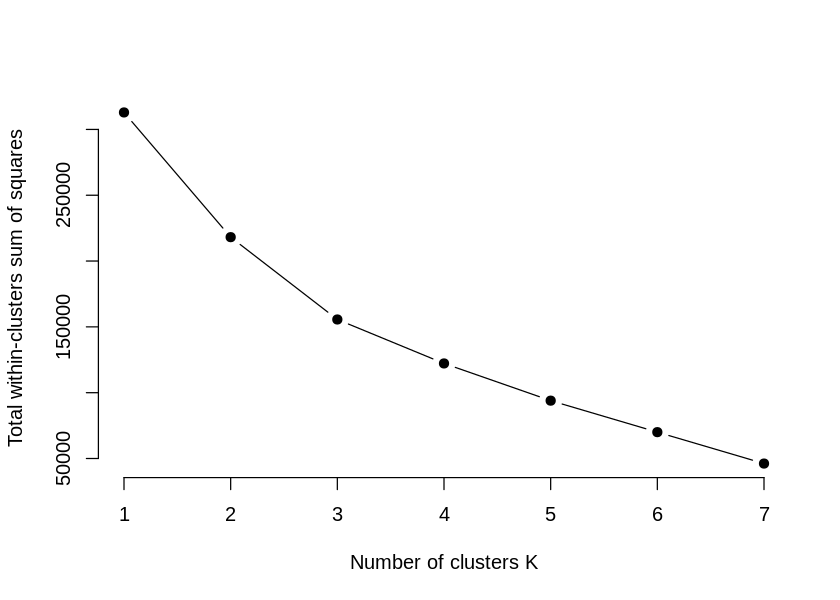

In [62]:
fig(7,5)
#Elbow Method for finding the optimal number of clusters
set.seed(917)
# Compute and plot wss for k = 2 to k = 7.
k.max <- 7
data <- norm_df
wss <- sapply(1:k.max, 
              function(k){kmeans(data, k, nstart=50,iter.max = 15 )$tot.withinss})
wss
plot(1:k.max, wss,
     type="b", pch = 19, frame = FALSE, 
     xlab="Number of clusters K",
     ylab="Total within-clusters sum of squares")

In [63]:
sum(is.na(norm_df))

[1] 0

In [87]:
#Run k-means cluster of the dataset
set.seed(1321)

km <- kmeans(subset(norm_df, select=-c(Case.status)), 2)
str(km)
#Tabulate the cross distribution
table(km$cluster,norm_df$Case.status)


List of 9
 $ cluster     : Named int [1:297729] 1 2 1 2 1 2 1 1 2 1 ...
  ..- attr(*, "names")= chr [1:297729] "1" "2" "3" "4" ...
 $ centers     : num [1:2, 1:9] 0.559 0 0.153 0 0 ...
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr [1:2] "1" "2"
  .. ..$ : chr [1:9] "Alberta.Health.Services.Zone.Calgary.Zone" "Alberta.Health.Services.Zone.Central.Zone" "Alberta.Health.Services.Zone.Edmonton.Zone" "Alberta.Health.Services.Zone.North.Zone" ...
 $ totss       : num 310031
 $ withinss    : num [1:2] 189851 30545
 $ tot.withinss: num 220396
 $ betweenss   : num 89634
 $ size        : int [1:2] 202264 95465
 $ iter        : int 1
 $ ifault      : int 0
 - attr(*, "class")= chr "kmeans"


   
         0      1
  1 200604   1660
  2  94225   1240

`geom_smooth()` using formula 'y ~ x'


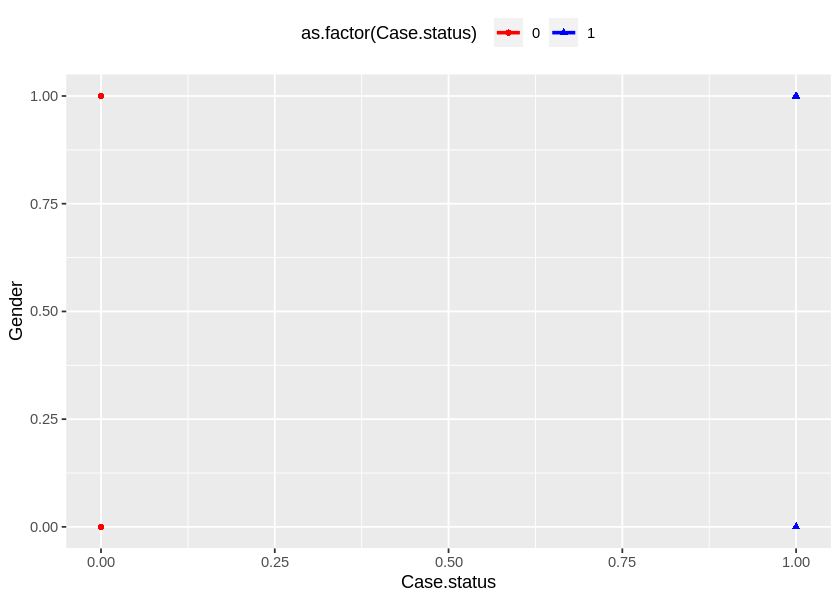

In [67]:
# visulaize clusters
km$cluster <- factor(km$cluster)

ggplot(norm_df, aes(Case.status, Gender, color=as.factor(Case.status), shape=as.factor(Case.status))) +
  geom_point() + 
  geom_smooth(method=lm, se=FALSE, fullrange=TRUE)+
  scale_shape_manual(values=c( 16, 17))+ 
  scale_color_manual(values=c('red', 'blue'))+
  theme(legend.position="top")

### 3.4. Ensemble( Random Forest)

In [70]:
train=na.omit(train)
test=na.omit(test)
train=train[sample(nrow(train), 10000), ]
test=test[sample(nrow(test), 10000), ]


In [72]:
library(randomForest)
require(caTools)
rf <- randomForest(
  Case.status ~ .,
  data=train
)


In [74]:
head(train)

,Alberta.Health.Services.Zone.Calgary.Zone,Alberta.Health.Services.Zone.Central.Zone,Alberta.Health.Services.Zone.Edmonton.Zone,Alberta.Health.Services.Zone.North.Zone,Alberta.Health.Services.Zone.South.Zone,Alberta.Health.Services.Zone.Unknown,Gender,Age.group,Case.status,Case.type
224034,0,0,1,0,0,0,1,6,0,1
294621,0,0,0,1,0,0,0,6,0,1
127755,1,0,0,0,0,0,1,5,0,1
36349,1,0,0,0,0,0,0,7,0,1
214981,0,1,0,0,0,0,0,8,0,1
150516,1,0,0,0,0,0,1,9,0,1


In [75]:
library(caret)

pred = predict(rf, newdata=train)
confusionMatrix(as.factor(pred), train$Case.status, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 9903   97
         1    0    0
                                          
               Accuracy : 0.9903          
                 95% CI : (0.9882, 0.9921)
    No Information Rate : 0.9903          
    P-Value [Acc > NIR] : 0.527           
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.0000          
            Specificity : 1.0000          
         Pos Pred Value :    NaN          
         Neg Pred Value : 0.9903          
             Prevalence : 0.0097          
         Detection Rate : 0.0000          
   Detection Prevalence : 0.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 1               
                        

In [76]:
pred = predict(rf, newdata=test)

confusionMatrix(as.factor(pred), test$Case.status, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 9907   93
         1    0    0
                                          
               Accuracy : 0.9907          
                 95% CI : (0.9886, 0.9925)
    No Information Rate : 0.9907          
    P-Value [Acc > NIR] : 0.5275          
                                          
                  Kappa : 0               
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.0000          
            Specificity : 1.0000          
         Pos Pred Value :    NaN          
         Neg Pred Value : 0.9907          
             Prevalence : 0.0093          
         Detection Rate : 0.0000          
   Detection Prevalence : 0.0000          
      Balanced Accuracy : 0.5000          
                                          
       'Positive' Class : 1               
                        

## Over-Sampling


In [78]:
set.seed(555)
rf <- randomForest(
  Case.status ~ .,
  data=over[sample(nrow(over), 10000), ]
)

pred = predict(rf, newdata=over[sample(nrow(over), 10000), ])

confusionMatrix(as.factor(pred), over[sample(nrow(over), 10000), ]$Case.status, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2505 2436
         1 2507 2552
                                          
               Accuracy : 0.5057          
                 95% CI : (0.4959, 0.5155)
    No Information Rate : 0.5012          
    P-Value [Acc > NIR] : 0.1867          
                                          
                  Kappa : 0.0114          
                                          
 Mcnemar's Test P-Value : 0.3194          
                                          
            Sensitivity : 0.5116          
            Specificity : 0.4998          
         Pos Pred Value : 0.5044          
         Neg Pred Value : 0.5070          
             Prevalence : 0.4988          
         Detection Rate : 0.2552          
   Detection Prevalence : 0.5059          
      Balanced Accuracy : 0.5057          
                                          
       'Positive' Class : 1               
                        

In [80]:
pred = predict(rf, newdata=test[1:1000,])

confusionMatrix(as.factor(pred), test[1:1000,]$Case.status, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 864   0
         1 128   8
                                          
               Accuracy : 0.872           
                 95% CI : (0.8497, 0.8921)
    No Information Rate : 0.992           
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0975          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.00000         
            Specificity : 0.87097         
         Pos Pred Value : 0.05882         
         Neg Pred Value : 1.00000         
             Prevalence : 0.00800         
         Detection Rate : 0.00800         
   Detection Prevalence : 0.13600         
      Balanced Accuracy : 0.93548         
                                          
       'Positive' Class : 1               
                              

## Under-Sampling

In [81]:
set.seed(777)
rf <- randomForest(
  Case.status ~ .,
  data=under[sample(nrow(under), 1000), ]
)
pred = predict(rf, newdata=under[sample(nrow(under), 1000), ])

confusionMatrix(as.factor(pred), under[sample(nrow(under), 1000), ]$Case.status, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 244 225
         1 280 251
                                          
               Accuracy : 0.495           
                 95% CI : (0.4636, 0.5265)
    No Information Rate : 0.524           
    P-Value [Acc > NIR] : 0.96905         
                                          
                  Kappa : -0.007          
                                          
 Mcnemar's Test P-Value : 0.01626         
                                          
            Sensitivity : 0.5273          
            Specificity : 0.4656          
         Pos Pred Value : 0.4727          
         Neg Pred Value : 0.5203          
             Prevalence : 0.4760          
         Detection Rate : 0.2510          
   Detection Prevalence : 0.5310          
      Balanced Accuracy : 0.4965          
                                          
       'Positive' Class : 1               
                              

In [82]:
pred = predict(rf, newdata=test[1:1000,])

confusionMatrix(as.factor(pred), test[1:1000,]$Case.status, positive = "1")

Confusion Matrix and Statistics

          Reference
Prediction   0   1
         0 864   0
         1 128   8
                                          
               Accuracy : 0.872           
                 95% CI : (0.8497, 0.8921)
    No Information Rate : 0.992           
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 0.0975          
                                          
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 1.00000         
            Specificity : 0.87097         
         Pos Pred Value : 0.05882         
         Neg Pred Value : 1.00000         
             Prevalence : 0.00800         
         Detection Rate : 0.00800         
   Detection Prevalence : 0.13600         
      Balanced Accuracy : 0.93548         
                                          
       'Positive' Class : 1               
                              